# Practical work 6 : Harris Corner Detector

The goal of this pratical work is to implement the Harris-Stephen's corners detector (C. Harris and M. Stephens. A combined corner and edge detector. In Proc. Fourth Alvey Vision Conference, pages 147–151, 1988).

Recall the Harris detector computes a map of corners from an image $I$:
$$
R(x,y) = \operatorname{det}(M) - k (\operatorname{trace}(M))^2, (x,y) \text{pixels}
$$
with $k\in[0.04, 0.06]$. $M$ is the auto-correlation of image $I$:
$$
M=\begin{pmatrix}
\sum_{x,y \in W} w(x,y)I_x^2 &
\sum_{x,y \in W} w(x,y)I_xI_y \\
\sum_{x,y \in W} w(x,y)I_xI_y &
\sum_{x,y \in W} w(x,y)I_y^2 
\end{pmatrix}
=\begin{pmatrix}
A & B \\ C & D
\end{pmatrix}
$$
with $w(x,y)=\frac1{2\pi \sigma^2}e^{\frac{(x-x_c)^2 + (y-y_c)^2}{2\sigma^2}}$ a Gaussian mask centered on the window $W$. Partial derivatives $I_x$ and $I_y$ are estimated by one of the following kernels :
- Gradient:  $G_x = \begin{pmatrix} 0 & 0 & 0\\ 1 & 0 &-1 \\ 0 & 0 & 0 \end{pmatrix}$,
 $G_y = G_x^T$
- Prewitt: $G_x = \begin{pmatrix} 1 & 0 & -1\\ 1 & 0 &-1 \\ 1 & 0 & -1 \end{pmatrix}$,
 $G_y = G_x^T$
- Sobel: $G_x = \begin{pmatrix} 1 & 0 & -1\\ 2 & 0 &-2 \\ 1 & 0 & -1 \end{pmatrix}$,
 $G_y = G_x^T$
 


In [5]:
# Load useful libraries
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
from scipy.signal import convolve2d

# Useful functions 
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = int(np.ceil(3*sigma))
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()

## Exercise 1: Harris response calculation

1) Write a function `computeR(I, scale, kappa)` that returns the Harris response $R$ from an image $I$ and a scale $scale$. You will use 5 steps:
- Computation of the directionnal derivate $I_x$ and $I_y$. Use the Sobel kernel.
- Computation of the products $I_x^2$, $I_y^2$, $I_x.I_y$.
- Computation of the convolution of $I_x^2$, $I_y^2$ and $I_x.I_y$ by a gaussian kernel of size N (use given function `gaussianKernel()`)
- Computation of $\operatorname{det}(M(x,y))$ and $\operatorname{trace}(M(x,y))$ for each pixel
- Computation of $R(x,y) = \operatorname{det}(M(x,y)) - k.(\operatorname{trace}(M(x,y)))^2$. You can use $k = 0.04$.

 You can compute the convolutions by using the ```scipy.signal.convolve2d``` function. 


In [6]:
#SOBEL DETECTOR
def SobelDetector(I):
    """ Array*double -> Array """
    
    image = np.array(I)
    Sx = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])
    Sy = Sx.transpose()
      
    Ix = convolve2d(image, Sx, 'same')
    Iy = convolve2d(image, Sy, 'same') #do it with laplacian

    return Ix, Iy

In [7]:
def computeR(image,scale,kappa):
    """ Array[n, m]*float*float->Array[n, m]
    """
    Ix, Iy = SobelDetector(image)

    #matrix products
    Ix2 = Ix**2
    Iy2 = Iy**2
    Ixy = Ix*Iy
    

    #convolution of the matrix products with a gaussian kernel of size N - 
    gauss_kernel = gaussianKernel((scale-1)/6)
    
    Ix2_conv = convolve2d(Ix2, gauss_kernel, 'same')
    Iy2_conv = convolve2d(Iy2, gauss_kernel, 'same')
    Ixy_conv = convolve2d(Ixy, gauss_kernel, 'same')

    det = Ix2_conv*Iy2_conv - (Ixy_conv**2)
    trace = Ix2_conv + Iy2_conv
    
    R = det - kappa*(trace**2)
       
    return Ix, Iy, Ix2_conv, Iy2_conv, Ixy_conv, R

2) Write a script that displays the Harris response for the image ```img/house2.png``` along with the original image. Use a gaussian window of size $W=15$ pixels.

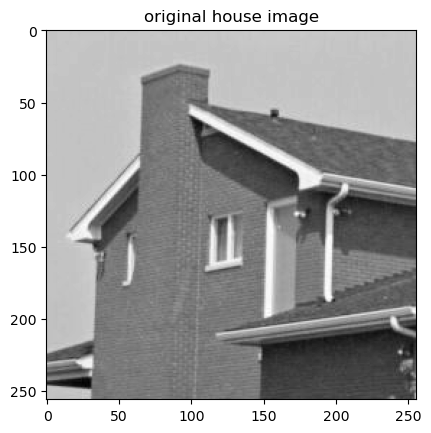

------------------ANALYSIS ON IMAGE----------------------------------------------------------


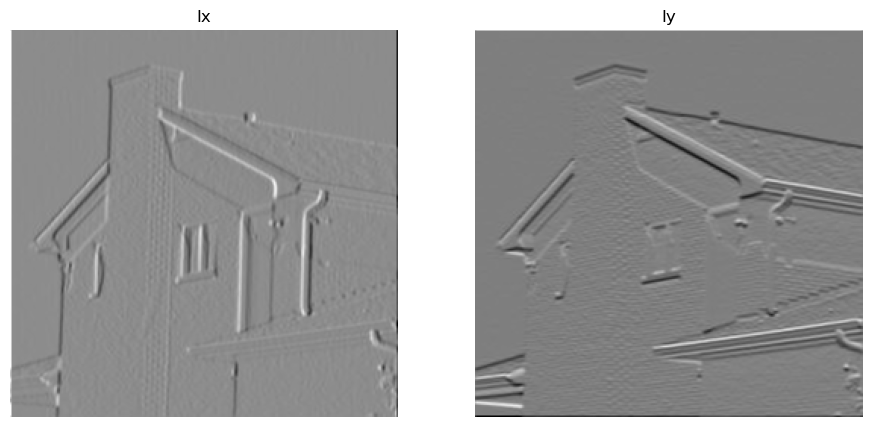

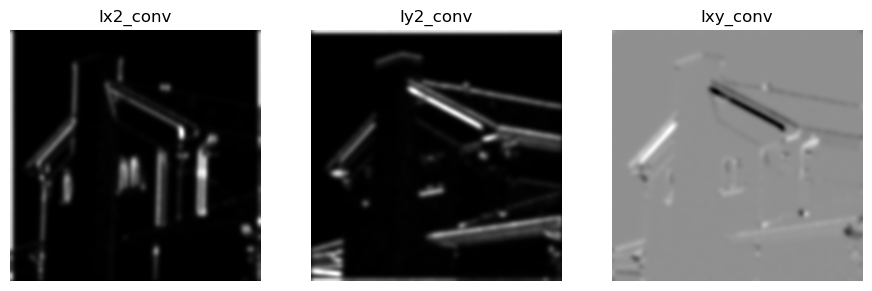

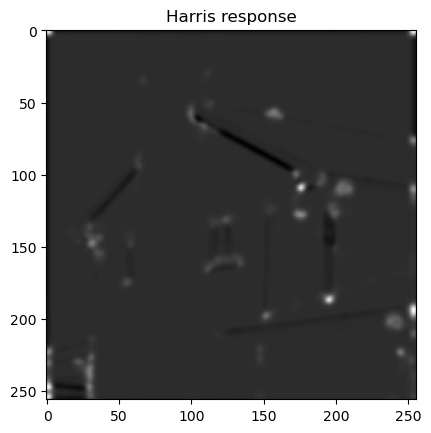

In [8]:
house2 = np.array(Image.open('img/house2.png'))

Ix, Iy, Ix2_conv, Iy2_conv, Ixy_conv, R = computeR(house2, 15, 0.04)

plt.imshow(house2, cmap='gray')
plt.title('original house image')
plt.show()

print('------------------ANALYSIS ON IMAGE----------------------------------------------------------')
#IX AND IY
fig = plt.figure(figsize=(11, 8))
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(Ix, cmap='gray')
plt.axis('off')
plt.title("Ix")
fig.add_subplot(rows, columns, 2)
plt.imshow(Iy, cmap='gray')
plt.axis('off')
plt.title("Iy")
plt.show()

#CONVOLVED IX2,IY2 AND IXY
fig = plt.figure(figsize=(11, 8))
rows = 1
columns = 3
fig.add_subplot(rows, columns, 1)
plt.imshow(Ix2_conv, cmap='gray')
plt.axis('off')
plt.title("Ix2_conv")
fig.add_subplot(rows, columns, 2)
plt.imshow(Iy2_conv, cmap='gray')
plt.axis('off')
plt.title("Iy2_conv")
fig.add_subplot(rows, columns, 3)
plt.imshow(Ixy_conv, cmap='gray')
plt.axis('off')
plt.title("Ixy_conv")
plt.show()

#R
plt.imshow(R, cmap='gray')
plt.title('Harris response')
plt.show()

3) Write in a few lines an interpretation of the results, explaining how the Harris response allows to detect and discriminate homogeneous areas, edges and corners.

the Harris response allows to detect and discriminate three areas in an image:

- homogeneous area
- edges
- corners

In particular the Harris Detector was born to detect "points of interest" - the corners. When studying an image, the corners are those critical points where there can be found discontinuity in the pixel values in two directions. Harris Detector exploits this property by working on the Autocorrelation Matrix of the image, which is calculated as the convolution product between a gaussian kernel and the matrix of the first order derivatives of the image on the x and y axis.

The idea behind this process is to observe a neighbouring window looking for variation in two directions.

This way for each pixel of the image we have a sub-matrix of 3x3, for which we can calculate Determinant and Trace.

Har = determinant - k*(trace^2)

The interpretation of the output Har is to find if the pixel belongs to one of three possible configurations:

- homogeneous region - where the determinant and trace are null, or near to zero ( |R| small)
- edge - where there is change of pixel only in one direction of the image, so only one out of the two eigenvalues is not null. This means that its determinant is close to zero, while the trace associated is not null. For the formula displayed above for the calculation of the Harris response, this way R<0.
- corner - in this situation the change of direction happens in both directions x and y, which means that both eigenvalues are not null. To check whether a pixel is a corner, its Har>0.

## Exercise 2 : Harris corner detector
From the Harris response calculated at exercise 1, we will write all the functions needed for the Harris detector. Write the following functions: 

1) A function `thresholdR(R, thres)` that calculates and returns the binary thresholding $R_b$ of the response $R$ according to the threshold $thres$

In [9]:
def thresholdR(R, thres):
    """ Array[n, m] * float -> Array[n, m]
    """
    return np.where(R>thres, 1, 0)

2) A function `Rnms(R, Rbin)` that performs a non-maximum supression from the response $R$ and the binarized response $R_{bin}$. It returns the image $R_{locmax}$ (same size as $R$) =1 where $R_{bin}=1$ and the pixel has a greater value $R$ than its 8 nearest neighbors.

**Bonus**: Write a faster version of the script using Numpy function `np.roll()`.

In [10]:
def rnms(image_harris):
    """ Array[n, m] -> Array[n, m] 
    """
    Rnms = np.zeros((image_harris.shape), dtype='int')
    
    for i in range(1, image_harris.shape[0]-1):
        for j in range(1, image_harris.shape[1]-1):
            subImage = image_harris[i-1:i+2:,j-1:j+2:]
            localMax = subImage.max()
            if (image_harris[i,j]==localMax): 
                Rnms[i,j]+=1
            
    return Rnms

3) Write a function ``cornerDetector(image, scale, kappa, thresh)`` that returns an array of the same size as the image. The array takes two values: 1 where a corner is detected and 0 elsewhere.

In [11]:
def cornerDetector(image, scale, kappa, thres):
    """ Array[n, m]*float*float*float -> Array[n, m]
    """
    #R
    Ix, Iy, Ix2_conv, Iy2_conv, Ixy_conv, R = computeR(image, scale, kappa)
    
    #Rbin
    Rbin = thresholdR(R, thres)
    
    #Rlocmax
    Rlocmax = rnms(R)

    return np.logical_and(Rlocmax, Rbin)

4 ) Display the detected corners on the original image for the image ```img/house2.png```. Each detected corner will be displayed as a small red disk. You can use the functions ```np.nonzero()``` and ```plt.scatter()``` to that purpose.


CORNER DETECTION ON HOUSE2----------------------------------------------------


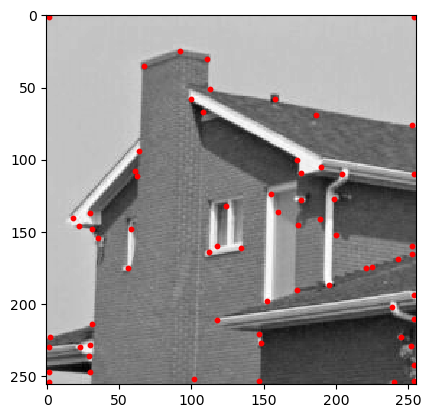

In [16]:
cornerDetectHouse = cornerDetector(house2, 17, 0.04, 10**7)

coordinatesHouse = np.nonzero(cornerDetectHouse)

print("\nCORNER DETECTION ON HOUSE2----------------------------------------------------")
plt.imshow(house2, interpolation ='nearest', cmap='gray')
plt.scatter(x= coordinatesHouse[1], y= coordinatesHouse[0], c='r', s=10)
plt.show()

5) Evaluate the performances of the corner detector. Try to find good values for Sigma and Threshold.

In the image above I have added red dots at the coordinates found as angles by the Harris Detector. To achieve this result the parameters I used are:

- Gaussian kernel size of 17x17
- threshold of 10^7 to discretize the pixels in the image

By varying the values of these two parameters we can get very different results from the Harris Detector. In general it is necessary to apply a Gaussian kernel to the image to reduce noise, but considering Harris Detection in particular, it is necessary to use a rather large window size in order to keep only the true angles of the function.

I show below Harris Corner Detection with a smaller window size. Being very sensitive to changes in direction, by decreasing the Gaussian kernel the detector also shows the corners of the bricks that make up the wall or the corners of the roof shadows on the wall. The adjacent image shows the output produced by the Detector with a lower threshold value. In this case small noises in the image are included as critical points in the discretization of the image, so we also find random elements that constitute noise as corners.

## Exercise 3 : Properties of Harris corner detector

The goal of this exercice is to study some invariance properties of Harris detector.

1) Write a script that detects the corners on the images ```img/toyHorse1.png``` and ```img/toyHorse2.png``` with a scale of 15 and appropriate threshold value. Display the detected corners on the images.

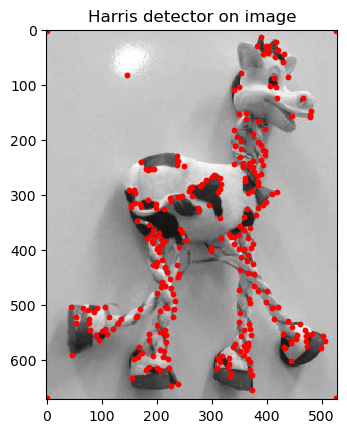

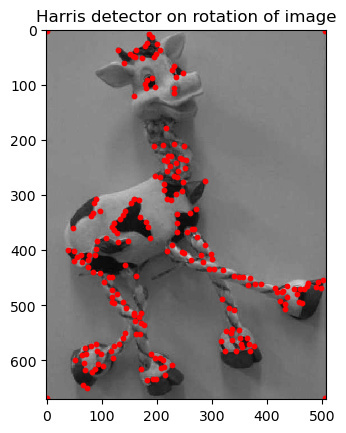



dynamic range first image:  42.11


dynamic range second image:  48.06


In [17]:
toyHorse1 = np.array(Image.open('img/toyHorse1.png'))
toyHorse2 = np.array(Image.open('img/toyHorse2.png'))

#----
cornerDetectHorse1 = cornerDetector(toyHorse1, 15, 0.04, 10**7)

coordinatesHorse1 = np.nonzero(cornerDetectHorse1)


plt.imshow(toyHorse1, interpolation ='nearest', cmap='gray')
plt.scatter(x= coordinatesHorse1[1], y= coordinatesHorse1[0], c='r', s=10)
plt.title('Harris detector on image')
plt.show()

#----
cornerDetectHorse2 = cornerDetector(toyHorse2, 15, 0.04, 10**7)

coordinatesHorse2 = np.nonzero(cornerDetectHorse2)

plt.imshow(toyHorse2, interpolation ='nearest', cmap='gray')
plt.scatter(x= coordinatesHorse2[1], y= coordinatesHorse2[0], c='r', s=10)
plt.title('Harris detector on rotation of image')
plt.show()

print("\n\ndynamic range first image: ", np.round(20*np.log10((toyHorse1.max())/(toyHorse1.min()+1)),2))
print("\n\ndynamic range second image: ", np.round(20*np.log10((toyHorse2.max())/(toyHorse2.min()+1)),2))

2) What are the dynamic ranges of these two images ?

The dynamic range of an image is calculated as the difference between the maximum and minimum brightness values of an image. In particular it can be computed as: 20*log10(maxVal/(minVal+1))

- dynamic range first image: 42.11
- dynamic range second image: 48.06

The two pictures have a slightly different dynamic range, where the second image's is higher than the firs one. This means that the second picture is darker than the first one, as can be observed just by looking at the picture.

3) What are the transformations beetween the two images ?

There are two kind of transformation in the picture:

- rotation of the image by an angle theta
- decrease of the pixel value in the second picture - affine transformation of brightness

4) Using a fixed threshold, is the detection invariant to rotation ? To affine transformation of brightness ?

The detection is invariant to rotation and to transformation of brightess, as it can be seen from the displayed images above.

- invariance to affine transformation of image: all pixels composing the picture are increased or decreased of the same constant. Since we are using the first derivate of the image, the derivate of a constant is 0 so it does not change the corner detection.

- invariance to rotation of the image: when considering a rotation applied to an image we can build the rotation matrix of the image. We have proved during the TP of the 25th of October how the image matrix multiplied by the rotation matrix has the same determinant as the original matrix.

Both properties can be seen in the displayed pictures by observing how the corners detected are the same.